# ECG Data Example

This is an example dataset available with Scipy. The provided signal is an excerpt (19:35 to 24:35) from the record 208 (lead MLII) provided by the MIT-BIH Arrhythmia Database [1] on PhysioNet [2]. The excerpt includes noise induced artifacts, typical heartbeats as well as pathological changes.

In [1]:
import numpy as np
import heartpy as hp
import matplotlib.pyplot as plt
from scipy.datasets import electrocardiogram

In [2]:
ecg =  electrocardiogram()

The first few seconds show the electrical activity of a heart in
normal sinus rhythm as seen below.

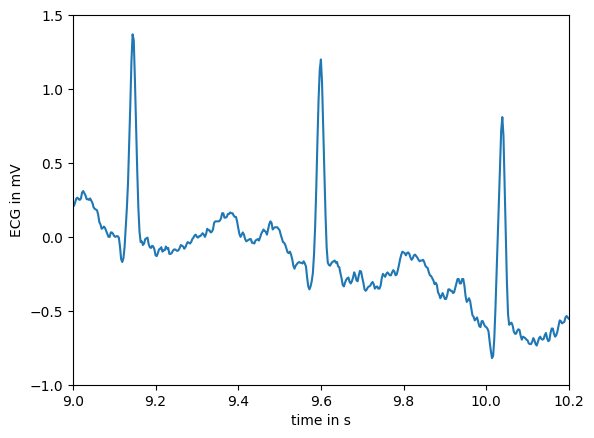

In [3]:
fs = 360
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(9, 10.2)
plt.ylim(-1, 1.5)
plt.show()


After second 16, however, the first premature ventricular contractions,
also called extrasystoles, appear. These have a different morphology
compared to typical heartbeats. The difference can easily be observed
in the following plot.

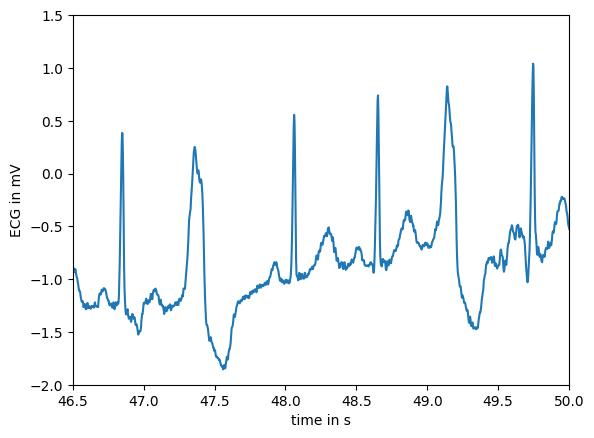

In [4]:
plt.plot(time, ecg)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(46.5, 50)
plt.ylim(-2, 1.5)
plt.show()


At several points large artifacts disturb the recording, e.g.:

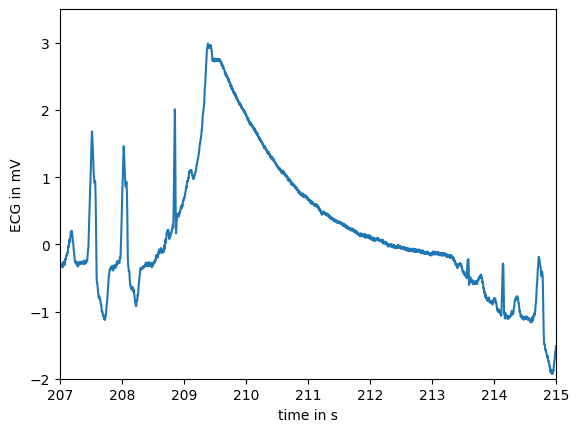

In [5]:
plt.plot(time, ecg)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(207, 215)
plt.ylim(-2, 3.5)
plt.show()


Finally, examining the power spectrum reveals that most of the biosignal is
made up of lower frequencies. At 60 Hz the noise induced by the mains
electricity can be clearly observed.

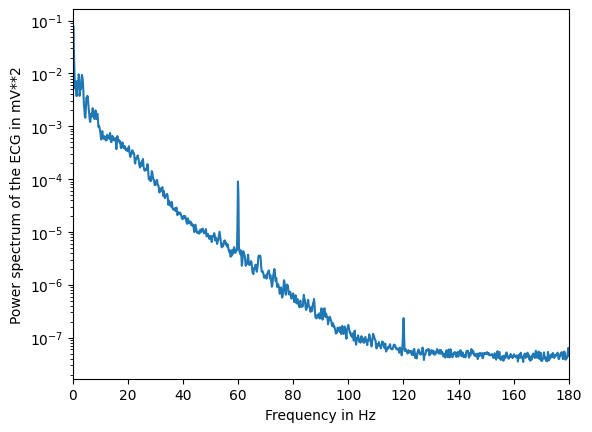

In [6]:
from scipy.signal import welch
f, Pxx = welch(ecg, fs=fs, nperseg=2048, scaling="spectrum")
plt.semilogy(f, Pxx)
plt.xlabel("Frequency in Hz")
plt.ylabel("Power spectrum of the ECG in mV**2")
plt.xlim(f[[0, -1]])
plt.show()

# HeartPy Analysis

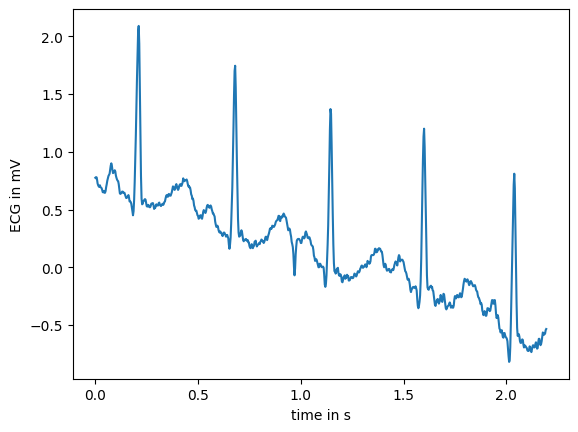

In [7]:
section = ecg[int(8 * fs) : int(10.2 * fs)]
time_sec =  np.arange(section.size) / fs

plt.plot(time_sec, section)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.show()

bpm: 131.306991
ibi: 456.944444
sdnn: 11.536978
sdsd: 4.721314
rmssd: 11.226255
pnn20: 0.000000
pnn50: 0.000000
hr_mad: 6.944444
sd1: 3.338473
sd2: 11.377968
s: 119.333537
sd1/sd2: 0.293416
breathingrate: 0.547945


/home/ftei-dsw/Documents/Research/DSAIL/wearables/wearable-env/lib/python3.10/site-packages/heartpy/visualizeutils.py:119: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 1200x400 with 0 Axes>

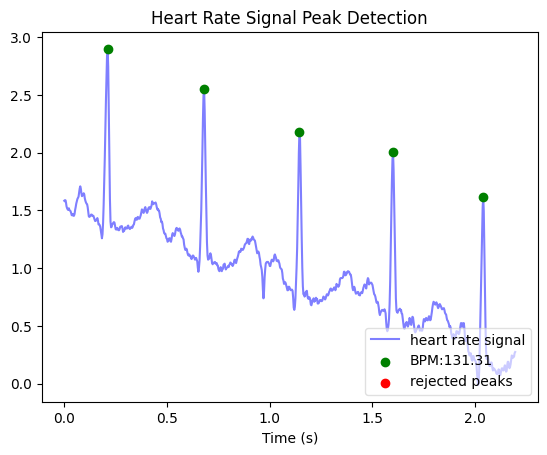

In [8]:
#run analysis
wd, m = hp.process(section, fs)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))


## References
[1] Moody GB, Mark RG. The impact of the MIT-BIH Arrhythmia Database. IEEE Eng in Med and Biol 20(3):45-50 (May-June 2001). (PMID: 11446209); DOI:10.13026/C2F305

[2] Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals. Circulation 101(23):e215-e220; DOI:10.1161/01.CIR.101.23.e215

